# ImmoEliza Data Analysis

## Data Cleaning

### Import Necessary Librairies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


### Setting the dataset in a variable called "data"

In [3]:
data = pd.read_json("final_dataset.json")
pd.options.display.max_columns = 35             #just extending the number  of columns that can be seen
pd.options.display.max_colwidth = 120           #just extending the width of columns to be able to click on Url for checking infos
data.shape

(118714, 32)

### Checking  if there is any duplicates

In [4]:
data.drop_duplicates("PropertyId",inplace=True)
data.shape



(118714, 32)

### Seems not let's move on to the next step which  is checking null values

In [5]:
data.isnull().sum()

Url                       0
BathroomCount          9602
BedroomCount              0
ConstructionYear      49816
Country                   0
District                  7
Fireplace            114591
FloodingZone          60372
Furnished             88389
Garden                96211
GardenArea            96211
Kitchen               51580
LivingArea            14175
Locality                  2
MonthlyCharges       105064
NumberOfFacades       41772
PEB                   33640
PostalCode                0
Price                     0
PropertyId                0
Province                  7
Region                    7
RoomCount             85798
ShowerCount           61587
StateOfBuilding       37092
SubtypeOfProperty         0
SurfaceOfPlot         60477
SwimmingPool          78356
Terrace               50370
ToiletCount           22273
TypeOfProperty            0
TypeOfSale                0
dtype: int64

### Get rid of null values when possible

In [6]:
data.update(data[["BathroomCount","Fireplace","Furnished","Garden","GardenArea","SwimmingPool","Terrace","ToiletCount"]].fillna(0))
data.shape

(118714, 32)

### Get rid of potentials encoding errors

In [7]:
data.drop(data[data.BathroomCount > data.BedroomCount].index,inplace=True)
data.drop(data[data.ConstructionYear > 2033].index,inplace=True)
data.drop(data[data.GardenArea > data.SurfaceOfPlot].index,inplace=True)
data.drop(data[data.PostalCode < 1000].index,inplace=True)
data.drop(data[data.NumberOfFacades > 4].index,inplace=True)
data.drop(data[data.Price > 15000000].index,inplace=True)
data.drop(data[data.ToiletCount > 58].index,inplace=True)
data.drop(data[data.ShowerCount > 58].index,inplace=True)
data.drop(data[data.TypeOfSale == "annuity_monthly_amount"].index,inplace=True)
data.drop(data[data.TypeOfSale == "annuity_without_lump_sum"].index,inplace=True)
data.drop(data[data.TypeOfSale == "annuity_lump_sum"].index,inplace=True)


data.shape

(114529, 32)

### Super looks like we deleted more than 4000 errors. Great!

### Separate sale data and rent data to express more things

In [8]:
sale_data = data[data.TypeOfSale == "residential_sale"]
rent_data = data[data.TypeOfSale == "residential_monthly_rent"]
print(sale_data.shape)
print(rent_data.shape)

(101817, 32)
(12712, 32)


## Data Analysis

### See how many rows and columns we have

In [9]:
print(sale_data.shape)
print(rent_data.shape)

(101817, 32)
(12712, 32)


In [10]:
sale_data.head()

,Url,BathroomCount,BedroomCount,ConstructionYear,Country,District,Fireplace,FloodingZone,Furnished,Garden,GardenArea,Kitchen,LivingArea,Locality,MonthlyCharges,NumberOfFacades,PEB,PostalCode,Price,PropertyId,Province,Region,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
2,https://www.immoweb.be/en/classified/apartment/for-sale/zeebrugge/8380/10957010,1.0,1,1969.0,Belgium,Brugge,0.0,None,0.0,0.0,0.0,None,29.0,Zeebrugge,NaN,NaN,None,8380,99000,10957010,West Flanders,Flanders,1.0,0.0,GOOD,flat_studio,NaN,0.0,1.0,1.0,2,residential_sale
6,https://www.immoweb.be/en/classified/house/for-sale/tournai/7500/10956841,6.0,13,1920.0,Belgium,Tournai,0.0,None,0.0,0.0,0.0,None,391.0,Tournai,NaN,3.0,D,7500,765000,10956841,Hainaut,Wallonie,31.0,NaN,GOOD,apartment_block,130.0,0.0,0.0,5.0,1,residential_sale
8,https://www.immoweb.be/en/classified/house/for-sale/blankenberge/8370/10956807,2.0,4,2008.0,Belgium,Brugge,0.0,NON_FLOOD_ZONE,1.0,0.0,0.0,INSTALLED,111.0,BLANKENBERGE,NaN,2.0,B,8370,399000,10956807,West Flanders,Flanders,NaN,0.0,GOOD,house,0.0,0.0,0.0,2.0,1,residential_sale
10,https://www.immoweb.be/en/classified/house/for-sale/de-panne/8660/10956664,1.0,4,NaN,Belgium,Veurne,0.0,None,0.0,1.0,1.0,None,NaN,De Panne,NaN,2.0,F,8660,230000,10956664,West Flanders,Flanders,NaN,NaN,TO_BE_DONE_UP,house,170.0,0.0,1.0,2.0,1,residential_sale
11,https://www.immoweb.be/en/classified/apartment/for-sale/hasselt/3500/10956668,0.0,2,1972.0,Belgium,Hasselt,0.0,NON_FLOOD_ZONE,0.0,0.0,0.0,None,92.0,Hasselt,NaN,NaN,B,3500,198000,10956668,Limburg,Flanders,1.0,0.0,AS_NEW,apartment,NaN,0.0,1.0,1.0,2,residential_sale


In [11]:
rent_data.head()

,Url,BathroomCount,BedroomCount,ConstructionYear,Country,District,Fireplace,FloodingZone,Furnished,Garden,GardenArea,Kitchen,LivingArea,Locality,MonthlyCharges,NumberOfFacades,PEB,PostalCode,Price,PropertyId,Province,Region,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
15,https://www.immoweb.be/en/classified/house/for-rent/waterloo/1410/10956598,4.0,6,1970.0,Belgium,Nivelles,1.0,NON_FLOOD_ZONE,0.0,1.0,2519.0,INSTALLED,425.0,WATERLOO,0.0,4.0,C,1410,5500,10956598,Walloon Brabant,Wallonie,NaN,0.0,GOOD,villa,2519.0,0.0,1.0,5.0,1,residential_monthly_rent
25,https://www.immoweb.be/en/classified/apartment/for-rent/ixelles/1050/10956216,1.0,3,NaN,Belgium,Brussels,0.0,NON_FLOOD_ZONE,0.0,0.0,0.0,USA_INSTALLED,200.0,Ixelles,200.0,2.0,B,1050,2700,10956216,Brussels,Brussels,6.0,2.0,GOOD,apartment,NaN,0.0,1.0,3.0,2,residential_monthly_rent
147,https://www.immoweb.be/en/classified/apartment/for-rent/etterbeek/1040/10954247,1.0,1,1920.0,Belgium,Brussels,0.0,None,0.0,0.0,0.0,INSTALLED,55.0,Etterbeek,200.0,2.0,None,1040,900,10954247,Brussels,Brussels,NaN,NaN,None,duplex,NaN,0.0,1.0,0.0,2,residential_monthly_rent
314,https://www.immoweb.be/en/classified/house/for-rent/uccle/1180/10952639,4.0,6,NaN,Belgium,Brussels,0.0,NON_FLOOD_ZONE,0.0,0.0,0.0,HYPER_EQUIPPED,800.0,Uccle,0.0,4.0,D,1180,12000,10952639,Brussels,Brussels,NaN,NaN,AS_NEW,villa,0.0,1.0,1.0,6.0,1,residential_monthly_rent
337,https://www.immoweb.be/en/classified/apartment/for-rent/oudenaarde/9700/10952183,1.0,1,2016.0,Belgium,Oudenaarde,0.0,None,0.0,0.0,0.0,None,NaN,Oudenaarde,0.0,NaN,None,9700,37,10952183,East Flanders,Flanders,NaN,0.0,None,service_flat,NaN,0.0,0.0,1.0,2,residential_monthly_rent


### See correlation between price and place

#### price/region

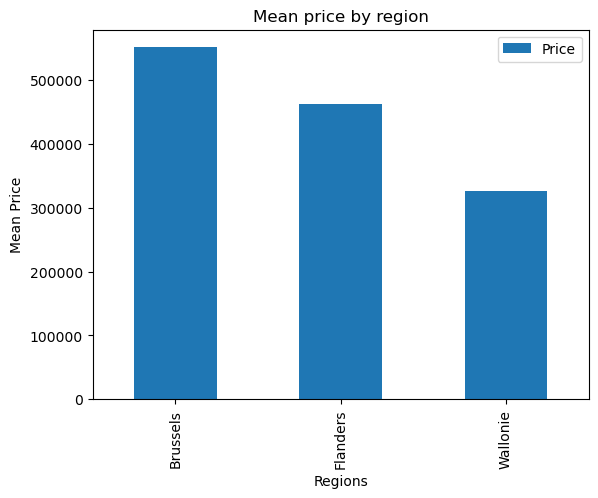

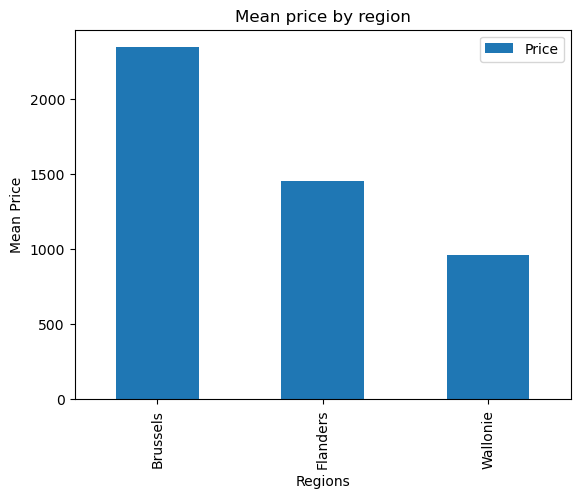

In [12]:
price_sale_region = sale_data.groupby("Region")[["Price"]].mean().round()
price_rent_region = rent_data.groupby("Region")[["Price"]].mean().round()
price_sale_region.plot.bar()
plt.title("Mean price by region")
plt.xlabel("Regions")
plt.ylabel("Mean Price")
price_rent_region.plot.bar()
plt.title("Mean price by region")
plt.xlabel("Regions")
plt.ylabel("Mean Price")
plt.show()

#### price/province

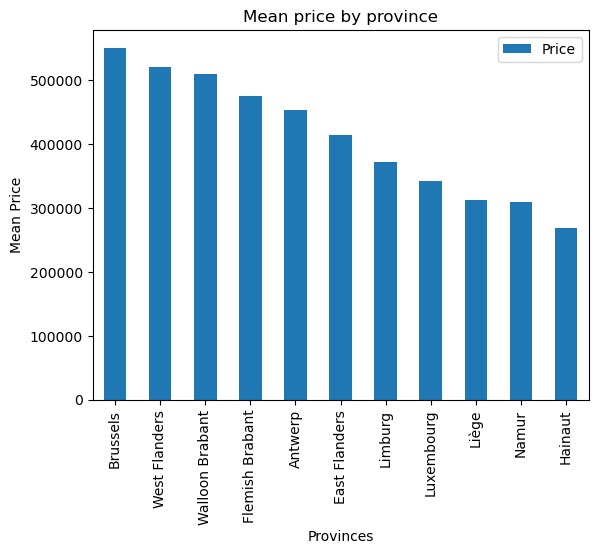

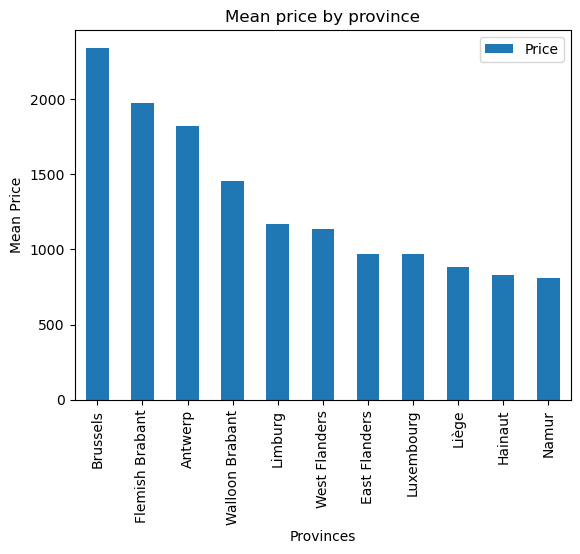

In [13]:
price_sale_province = sale_data.groupby("Province")[["Price"]].mean().round().sort_values("Price",ascending=False)
price_rent_province = rent_data.groupby("Province")[["Price"]].mean().round().sort_values("Price",ascending=False)
price_sale_province.plot.bar()
plt.title("Mean price by province")
plt.xlabel("Provinces")
plt.ylabel("Mean Price")
price_rent_province.plot.bar()
plt.title("Mean price by province")
plt.xlabel("Provinces")
plt.ylabel("Mean Price")
plt.show()

#### Price/District

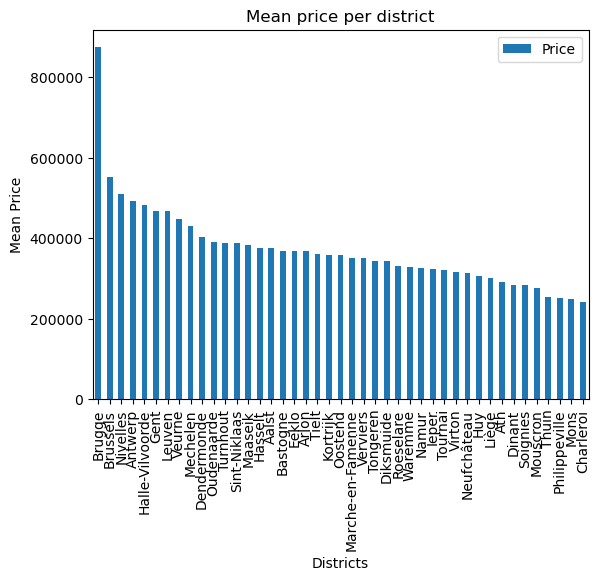

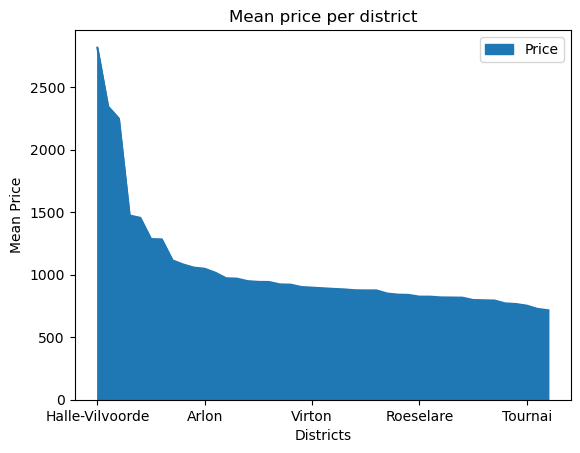

In [14]:
price_sale_district = sale_data.groupby("District")[["Price"]].mean().round().sort_values("Price",ascending=False)
price_rent_district = rent_data.groupby("District")[["Price"]].mean().round().sort_values("Price",ascending=False)
price_sale_district.plot.bar()
plt.title("Mean price per district")
plt.xlabel("Districts")
plt.ylabel("Mean Price")
price_rent_district.plot.area()
plt.title("Mean price per district")
plt.xlabel("Districts")
plt.ylabel("Mean Price")
plt.show()

In [15]:
# price_sale_district = sale_data.groupby("District")[["Price"]].mean().round().sort_values("Price",ascending=False)
# price_rent_district = rent_data.groupby("District")[["Price"]].mean().round().sort_values("Price",ascending=False)

In [16]:
sale_data.head()

,Url,BathroomCount,BedroomCount,ConstructionYear,Country,District,Fireplace,FloodingZone,Furnished,Garden,GardenArea,Kitchen,LivingArea,Locality,MonthlyCharges,NumberOfFacades,PEB,PostalCode,Price,PropertyId,Province,Region,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
2,https://www.immoweb.be/en/classified/apartment/for-sale/zeebrugge/8380/10957010,1.0,1,1969.0,Belgium,Brugge,0.0,None,0.0,0.0,0.0,None,29.0,Zeebrugge,NaN,NaN,None,8380,99000,10957010,West Flanders,Flanders,1.0,0.0,GOOD,flat_studio,NaN,0.0,1.0,1.0,2,residential_sale
6,https://www.immoweb.be/en/classified/house/for-sale/tournai/7500/10956841,6.0,13,1920.0,Belgium,Tournai,0.0,None,0.0,0.0,0.0,None,391.0,Tournai,NaN,3.0,D,7500,765000,10956841,Hainaut,Wallonie,31.0,NaN,GOOD,apartment_block,130.0,0.0,0.0,5.0,1,residential_sale
8,https://www.immoweb.be/en/classified/house/for-sale/blankenberge/8370/10956807,2.0,4,2008.0,Belgium,Brugge,0.0,NON_FLOOD_ZONE,1.0,0.0,0.0,INSTALLED,111.0,BLANKENBERGE,NaN,2.0,B,8370,399000,10956807,West Flanders,Flanders,NaN,0.0,GOOD,house,0.0,0.0,0.0,2.0,1,residential_sale
10,https://www.immoweb.be/en/classified/house/for-sale/de-panne/8660/10956664,1.0,4,NaN,Belgium,Veurne,0.0,None,0.0,1.0,1.0,None,NaN,De Panne,NaN,2.0,F,8660,230000,10956664,West Flanders,Flanders,NaN,NaN,TO_BE_DONE_UP,house,170.0,0.0,1.0,2.0,1,residential_sale
11,https://www.immoweb.be/en/classified/apartment/for-sale/hasselt/3500/10956668,0.0,2,1972.0,Belgium,Hasselt,0.0,NON_FLOOD_ZONE,0.0,0.0,0.0,None,92.0,Hasselt,NaN,NaN,B,3500,198000,10956668,Limburg,Flanders,1.0,0.0,AS_NEW,apartment,NaN,0.0,1.0,1.0,2,residential_sale


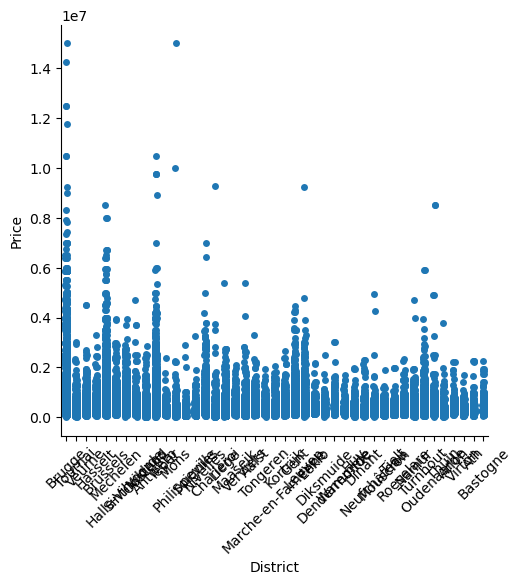

In [21]:
p = sns.catplot(data=sale_data, x="District", y="Price")
plt.xticks(rotation=45)
plt.show()

In [18]:
# sale_data_corr = sns.clustermap(sale_data.iloc[:,1:].corr(), 
#                    method = 'complete', 
#                    cmap   = 'RdBu', 
#                    annot  = True, 
#                    annot_kws = {'size': 8})
# plt.setp(sale_data_corr.ax_heatmap.get_xticklabels(), rotation=60)

In [19]:
sale_data_corr = sale_data.corr(numeric_only=True)
sale_data_corr

,BathroomCount,BedroomCount,ConstructionYear,Fireplace,Furnished,Garden,GardenArea,LivingArea,MonthlyCharges,NumberOfFacades,PostalCode,Price,PropertyId,RoomCount,ShowerCount,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty
BathroomCount,1.000000,0.452580,-0.120966,0.091089,0.055781,0.091810,0.088448,0.029272,NaN,0.066699,-0.079562,0.442915,0.017715,0.276896,0.344911,0.004177,0.153819,0.107795,0.486767,-0.143181
BedroomCount,0.452580,1.000000,-0.181041,0.110116,-0.010489,0.131094,0.086227,0.040757,NaN,0.155537,-0.003426,0.343423,0.012864,0.313140,0.282701,0.002490,0.100575,-0.016612,0.359910,-0.390097
ConstructionYear,-0.120966,-0.181041,1.000000,-0.118976,-0.022629,-0.130645,-0.069469,-0.018307,NaN,0.043117,0.122375,-0.024341,-0.065198,-0.076928,-0.103543,-0.000543,-0.018445,0.145533,-0.122235,0.376726
Fireplace,0.091089,0.110116,-0.118976,1.000000,0.019239,0.136685,0.060998,0.010779,NaN,0.151189,-0.058124,0.115946,0.023010,-0.011647,0.005201,-0.000229,0.122002,0.056440,0.131624,-0.134810
Furnished,0.055781,-0.010489,-0.022629,0.019239,1.000000,-0.000937,0.010195,-0.001868,NaN,-0.028880,-0.003038,0.031261,0.001922,-0.029604,0.100419,-0.000201,0.020653,0.018165,0.038901,0.050074
Garden,0.091810,0.131094,-0.130645,0.136685,-0.000937,1.000000,0.189412,0.012767,NaN,0.083754,-0.063365,0.038276,0.032892,0.019615,0.151741,0.006973,0.072134,0.132172,0.167046,-0.247984
GardenArea,0.088448,0.086227,-0.069469,0.060998,0.010195,0.189412,1.000000,0.011285,NaN,0.105229,-0.017136,0.102181,0.000381,0.040771,0.078088,0.028231,0.078422,0.034381,0.081540,-0.072773
LivingArea,0.029272,0.040757,-0.018307,0.010779,-0.001868,0.012767,0.011285,1.000000,NaN,0.012339,-0.002693,0.034653,0.004615,0.004979,0.018601,0.005887,0.013278,0.000086,0.023179,-0.026087
MonthlyCharges,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFacades,0.066699,0.155537,0.043117,0.151189,-0.028880,0.083754,0.105229,0.012339,NaN,1.000000,0.063051,0.176809,-0.010689,-0.051066,-0.027175,0.007565,0.165198,-0.023358,0.067561,-0.292086


In [20]:
sns.heatmap(sale_data.corr())


ValueError: could not convert string to float: 'https://www.immoweb.be/en/classified/apartment/for-sale/zeebrugge/8380/10957010'